In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import csv
from scipy.optimize import curve_fit

In [49]:
# optimal plot width for \Latex doc
figw = 3.404

## Hidrogen

In [2]:
# slit separation in metres
b = 0.001/600

In [3]:
# grating-lamp distance
d = np.linspace(40,80,5)

In [4]:
# pixel positions from each side, different lengths
h1 = np.array([[172,178],[195,201],[270,283]])
h2 = np.array([[169,178],[190,203],[264,286]])
h3 = np.array([[167,183],[188,208],[260,296]])
h4 = np.array([[180,172],[203,191],[290,265]])
h5 = np.array([[175,172],[198,196],[277,276]])

In [5]:
# measured wavelengths
hl1 = b*np.sin(np.arctan((h1/16)/(d[0])))
hl2 = b*np.sin(np.arctan((h2/14)/(d[1]-5)))
hl3 = b*np.sin(np.arctan((h3/12)/(d[2]-5)))
hl4 = b*np.sin(np.arctan((h4/10)/(d[3]-5)))
hl5 = b*np.sin(np.arctan((h5/9)/(d[4]-5)))

In [6]:
# hidrogen spectral series
h_alpha = np.mean([np.mean(hl1[2]),np.mean(hl2[2]),np.mean(hl3[2]),np.mean(hl4[2]),np.mean(hl5[2])])
h_beta = np.mean([np.mean(hl1[1]),np.mean(hl2[1]),np.mean(hl3[1]),np.mean(hl4[1]),np.mean(hl5[1])])
h_gamma = np.mean([np.mean(hl1[0]),np.mean(hl2[0]),np.mean(hl3[0]),np.mean(hl4[0]),np.mean(hl5[0])])

In [7]:
print ('alpha: %.4E, beta: %.4E, gamma: %.4E' %(h_alpha, h_beta, h_gamma))

alpha: 6.5197E-07, beta: 4.8357E-07, gamma: 4.3193E-07


In [10]:
h_err = np.array([np.std([np.mean(hl1[2]),np.mean(hl2[2]),np.mean(hl3[2]),np.mean(hl4[2]),np.mean(hl5[2])]),
                  np.std([np.mean(hl1[1]),np.mean(hl2[1]),np.mean(hl3[1]),np.mean(hl4[1]),np.mean(hl5[1])]),
                  np.std([np.mean(hl1[0]),np.mean(hl2[0]),np.mean(hl3[0]),np.mean(hl4[0]),np.mean(hl5[0])])])

In [29]:
n = np.linspace(3,5,3)
wl_h = np.array([h_alpha,h_beta,h_gamma])
theo = 1/(10973731.6*(1/4-1/(n**2)))

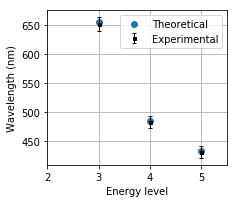

In [56]:
plt.figure(figsize=(figw,figw/1.1616))

plt.errorbar(n,wl_h*10**9, label='Experimental', yerr=h_err*10**9, elinewidth=1, capsize=2, marker='s', ms=3, color='k', lw=0)
plt.scatter(n,theo*10**9, label='Theoretical')
plt.xlabel('Energy level')
plt.ylabel('Wavelength (nm)')

plt.xticks(np.linspace(2,5,4))
plt.xlim(2,5.5)

plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('h.pdf')

## Helium

In [58]:
# pixel positions from each side, different lengths
he1 = np.array([[203,216],[217,230],[226,240],[232,246],[275,293],[316,340]])
he2 = np.array([[212,220],[226,235],[238,246],[243,251],[289,301],[333,348]])
he3 = np.array([[212,224],[225,237],[237,250],[242,255],[287,305],[332,355]])
he4 = np.array([[212,220],[224,234],[234,246],[240,251],[285,299],[331,346]])
he5 = np.array([[216,220],[228,234],[239,246],[244,251],[291,299],[338,346]])

In [59]:
# measured wavelengths
hel1 = b*np.sin(np.arctan((he1/16)/(d[0])))
hel2 = b*np.sin(np.arctan((he2/16)/(d[1]-5)))
hel3 = b*np.sin(np.arctan((he3/14)/(d[2]-5)))
hel4 = b*np.sin(np.arctan((he4/12)/(d[3]-5)))
hel5 = b*np.sin(np.arctan((he5/11)/(d[4]-5)))

In [60]:
# helium spectral series
he_alpha = np.mean([np.mean(hel1[5]),np.mean(hel2[5]),np.mean(hel3[5]),np.mean(hel4[5]),np.mean(hel5[5])])
he_beta = np.mean([np.mean(hel1[4]),np.mean(hel2[4]),np.mean(hel3[4]),np.mean(hel4[4]),np.mean(hel5[4])])
he_gamma = np.mean([np.mean(hel1[3]),np.mean(hel2[3]),np.mean(hel3[3]),np.mean(hel4[3]),np.mean(hel5[3])])
he_delta = np.mean([np.mean(hel1[2]),np.mean(hel2[2]),np.mean(hel3[2]),np.mean(hel4[2]),np.mean(hel5[2])])
he_epsilon = np.mean([np.mean(hel1[1]),np.mean(hel2[1]),np.mean(hel3[1]),np.mean(hel4[1]),np.mean(hel5[1])])
he_zeta = np.mean([np.mean(hel1[0]),np.mean(hel2[0]),np.mean(hel3[0]),np.mean(hel4[0]),np.mean(hel5[0])])

In [61]:
print ('alpha: %.4E, beta: %.4E, gamma: %.4E, delta: %.4E, epsilon: %.4E, zeta: %.4E' %(he_alpha, he_beta, he_gamma,
                                                                                       he_delta, he_epsilon, he_zeta))

alpha: 6.9057E-07, beta: 6.1021E-07, gamma: 5.2297E-07, delta: 5.1273E-07, epsilon: 4.9106E-07, zeta: 4.6438E-07


In [64]:
he_err = np.array([np.std([np.mean(hel1[5]),np.mean(hel2[5]),np.mean(hel3[5]),np.mean(hel4[5]),np.mean(hel5[5])]),
                  np.std([np.mean(hel1[4]),np.mean(hel2[4]),np.mean(hel3[4]),np.mean(hel4[4]),np.mean(hel5[4])]),
                  np.std([np.mean(hel1[3]),np.mean(hel2[3]),np.mean(hel3[3]),np.mean(hel4[3]),np.mean(hel5[3])]),
                  np.std([np.mean(hel1[2]),np.mean(hel2[2]),np.mean(hel3[2]),np.mean(hel4[2]),np.mean(hel5[2])]),
                  np.std([np.mean(hel1[1]),np.mean(hel2[1]),np.mean(hel3[1]),np.mean(hel4[1]),np.mean(hel5[1])]),
                  np.std([np.mean(hel1[0]),np.mean(hel2[0]),np.mean(hel3[0]),np.mean(hel4[0]),np.mean(hel5[0])])])

In [66]:
he_err*10**9

array([42.18779361, 40.02525138, 36.04920356, 34.8262782 , 34.78364417,
       31.98189799])

## Mercury

In [68]:
# pixel positions from each side, different lengths
hg1 = np.array([[212,202],[273,257],[291,274]])
hg2 = np.array([[222,206],[289,261],[308,277]])
hg3 = np.array([[236,206],[308,260],[330,276]])
hg4 = np.array([[222,208],[286,264],[306,282]])
hg5 = np.array([[222,205],[286,259],[305,276]])

In [69]:
# measured wavelengths
hgl1 = b*np.sin(np.arctan((hg1/20)/(d[0])))
hgl2 = b*np.sin(np.arctan((hg2/16)/(d[1]-5)))
hgl3 = b*np.sin(np.arctan((hg3/14)/(d[2]-5)))
hgl4 = b*np.sin(np.arctan((hg4/11)/(d[3]-5)))
hgl5 = b*np.sin(np.arctan((hg5/9)/(d[4]-5)))

In [77]:
hg_alpha = np.mean([np.mean(hgl1[2][1]),np.mean(hgl2[2][1]),np.mean(hgl3[2][1]),np.mean(hgl4[2][1]),np.mean(hgl5[2][1])])
hg_beta = np.mean([np.mean(hgl1[1]),np.mean(hgl2[1]),np.mean(hgl3[1]),np.mean(hgl4[1]),np.mean(hgl5[1])])
hg_gamma = np.mean([np.mean(hgl1[0]),np.mean(hgl2[0]),np.mean(hgl3[0]),np.mean(hgl4[0]),np.mean(hgl5[0])])

In [78]:
print ('alpha: %.4E, beta: %.4E, gamma: %.4E' %(hg_alpha, hg_beta, hg_gamma))

alpha: 5.8863E-07, beta: 5.8326E-07, gamma: 4.6684E-07


In [73]:
hg_err = np.array([np.std([np.mean(hgl1[2]),np.mean(hgl2[2]),np.mean(hgl3[2]),np.mean(hgl4[2]),np.mean(hgl5[2])]),
                  np.std([np.mean(hgl1[1]),np.mean(hgl2[1]),np.mean(hgl3[1]),np.mean(hgl4[1]),np.mean(hgl5[1])]),
                  np.std([np.mean(hgl1[0]),np.mean(hgl2[0]),np.mean(hgl3[0]),np.mean(hgl4[0]),np.mean(hgl5[0])])])

In [74]:
hg_err

array([3.46874257e-08, 3.32796479e-08, 2.82674503e-08])

In [76]:
print (hgl1[2],hgl2[2],hgl3[2],hgl4[2],hgl5[2])

[5.69728967e-07 5.40036621e-07] [6.55504580e-07 5.98443235e-07] [6.56532164e-07 5.62367360e-07] [6.55756168e-07 6.11499858e-07] [6.86279296e-07 6.30787759e-07]


In [79]:
b

1.6666666666666667e-06